In [1]:
import vital_sqi
from vital_sqi.data.signal_io import ECG_reader, PPG_reader
import os

### Read an EDF file using ECG_reader
**The function returns an Signal SQI object and a Dictionary contains the information of the file settings**

In [2]:
file_name = "example_edf.edf"
file_name = "../tests/test_data/example.edf"
ecg_data = ECG_reader(file_name,'edf')

In [3]:
ecg_data.info

[{'technician': '',
  'recording_additional': '',
  'patientname': 'NN',
  'patient_additional': '',
  'patientcode': 'Sensor: <NONE>, Device Type:',
  'equipment': 'Recording',
  'admincode': '24H-Electrode',
  'gender': '',
  'startdate': datetime.datetime(2019, 1, 22, 1, 4, 13),
  'birthdate': '',
  'annotations': [[1037.578, b'0.000000', 'Electrode Removed']]},
 [{'label': 'ECG Channel 1',
   'dimension': 'uV',
   'sample_rate': 256.0,
   'physical_max': 90298.0,
   'physical_min': -90298.0,
   'digital_max': 32767,
   'digital_min': -32768,
   'prefilter': '',
   'transducer': ''},
  {'label': 'ECG Channel 2',
   'dimension': 'uV',
   'sample_rate': 256.0,
   'physical_max': 90298.0,
   'physical_min': -90298.0,
   'digital_max': 32767,
   'digital_min': -32768,
   'prefilter': '',
   'transducer': ''}]]

### List all of the attributes in Signal_SQI object
1. signals: a numpy array contains the raw amplitude values of the devices
2. sampling_rate: the sampling rate derives from the signal data
3. wave_type: the types of signal. Only 2 types are accepted: either 'ecg' or 'ppg'
4. sqi_indexes: a list of sqi_indexes

In [4]:
ecg_data.__dict__

{'signals': array([[-1.36752522e+04, -7.65125191e+03],
        [-1.35167984e+03,  1.91522423e+02],
        [ 1.22836144e+04,  9.41491164e+03],
        ...,
        [ 7.29851997e+03,  1.37785916e+00],
        [ 7.83864076e+03,  1.37785916e+00],
        [ 9.78417789e+03,  1.37785916e+00]]),
 'sampling_rate': 256.0,
 'start_datetime': datetime.datetime(2019, 1, 22, 1, 4, 13),
 'wave_type': 'ecg',
 'sqi_indexes': None,
 'info': [{'technician': '',
   'recording_additional': '',
   'patientname': 'NN',
   'patient_additional': '',
   'patientcode': 'Sensor: <NONE>, Device Type:',
   'equipment': 'Recording',
   'admincode': '24H-Electrode',
   'gender': '',
   'startdate': datetime.datetime(2019, 1, 22, 1, 4, 13),
   'birthdate': '',
   'annotations': [[1037.578, b'0.000000', 'Electrode Removed']]},
  [{'label': 'ECG Channel 1',
    'dimension': 'uV',
    'sample_rate': 256.0,
    'physical_max': 90298.0,
    'physical_min': -90298.0,
    'digital_max': 32767,
    'digital_min': -32768,
   

In [5]:
all_channels = ecg_data.signals

In [6]:
channel_1 = all_channels[:,0]
ecg_sample_idx = int(len(all_channels)/2)

In [7]:
ecg_sample_complex_for_tapering = \
    channel_1[ecg_sample_idx-45:ecg_sample_idx+210]
ecg_sample_complex = channel_1[ecg_sample_idx+80:ecg_sample_idx+225]

In [8]:
import plotly.graph_objects as go
import numpy as np

### We will focus on 1 QRS-complex to examine the function

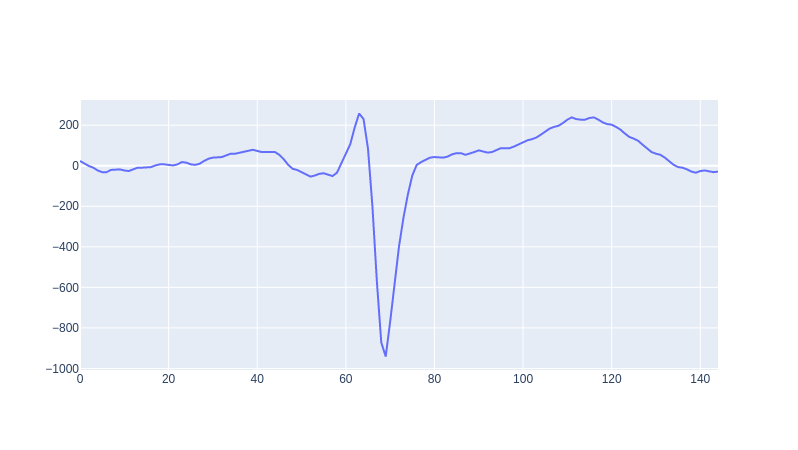

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_complex))
fig.show()

In [10]:
file_name = "ppg_smartcare.csv"
ppg_data = PPG_reader(os.path.join("../tests/test_data",file_name),
                      signal_idx=['PLETH'],
                      timestamp_idx= ['TIMESTAMP_MS'],
                      info_idx=['SPO2_PCT','PULSE_BPM','PERFUSION_INDEX'])

In [11]:
ppg_data.__dict__

{'signals': array([51399, 50011, 48555, ..., 15475, 14312, 13214]),
 'sampling_rate': 100,
 'start_datetime': None,
 'wave_type': 'ppg',
 'sqi_indexes': None,
 'info': {'SPO2_PCT': [99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
   99.9,
  

In [13]:
ppg_sample_idx = int(len(ppg_data.signals)/2)

In [14]:
ppg_sample_complex_for_tapering = \
    ppg_data.signals[ppg_sample_idx+185:ppg_sample_idx+225]
ppg_sample_complex = ppg_data.signals[ppg_sample_idx+195:ppg_sample_idx+267]

### Subsequently, we also focus on 1 PPG waveform to examine the function

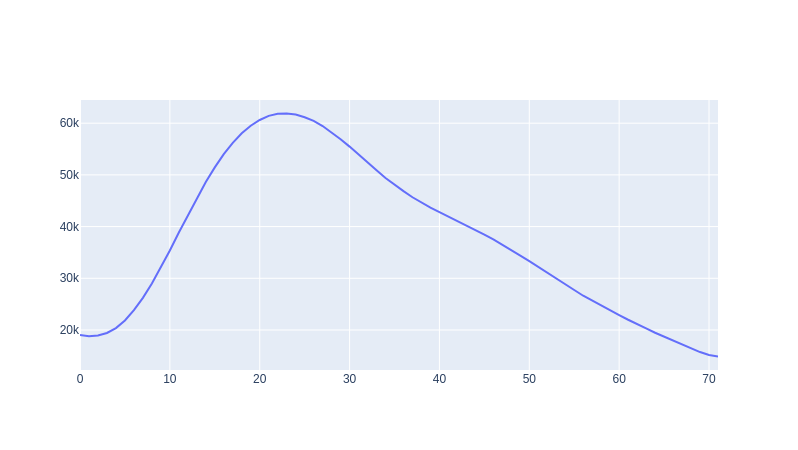

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_complex))
fig.show()

## Examples on preprocessing function
import the preprocess package

In [16]:
from vital_sqi import preprocess

### Taper data into the zerobaseline to remove the edge effect

In [17]:
ecg_sample_tapering_zerobaseline = preprocess.tapering(ecg_sample_complex,
                                                       shift_min_to_zero=True)
ppg_sample_tapering_zerobaseline = preprocess.tapering(ppg_sample_complex,
                                                       shift_min_to_zero=True)

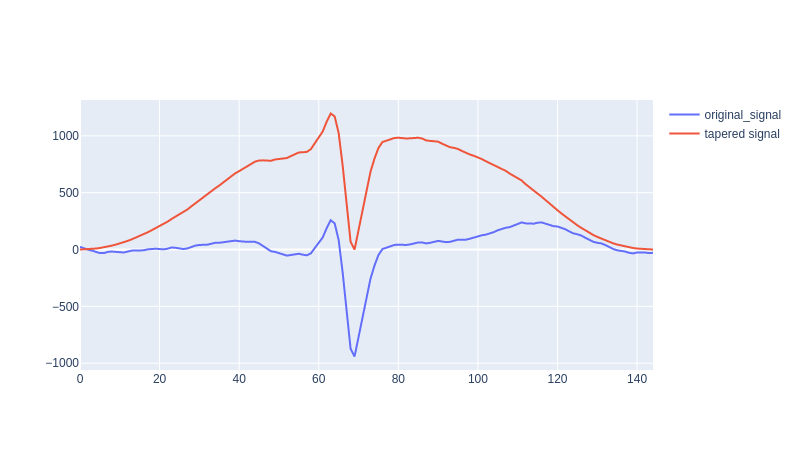

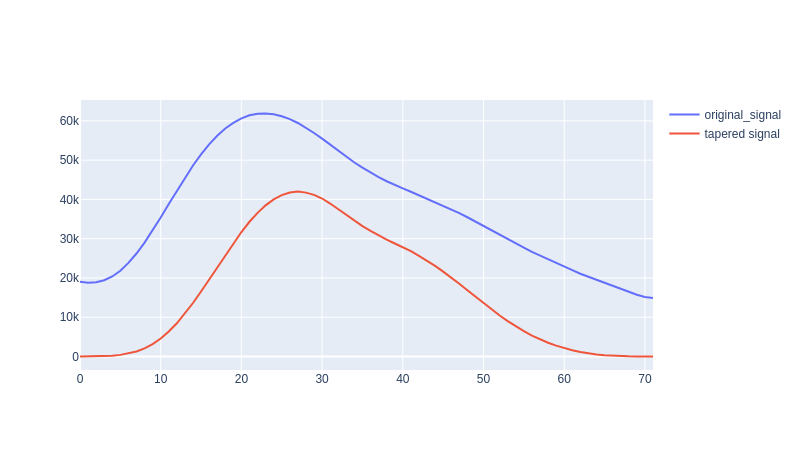

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_complex,
                         name='original_signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_tapering_zerobaseline,
                         name='tapered signal'))
fig.show(title='ecg tapering')
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_complex,
                         name='original_signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_tapering_zerobaseline)),
                         y= ppg_sample_tapering_zerobaseline,
                         name='tapered signal'))
fig.show()

### The tapering data will pin the first and last part at the zero pivot. The remaining will be scale according to the windows format

**The default tapering method shifts the segment by the value equal to the minimum value to the zero baseline set shift_min_to_zero=False**

In [117]:
ecg_sample_tapering_zerobaseline = \
    preprocess.tapering(ecg_sample_complex,shift_min_to_zero=False)
ppg_sample_tapering_zerobaseline = \
    preprocess.tapering(ppg_sample_complex,shift_min_to_zero=False)

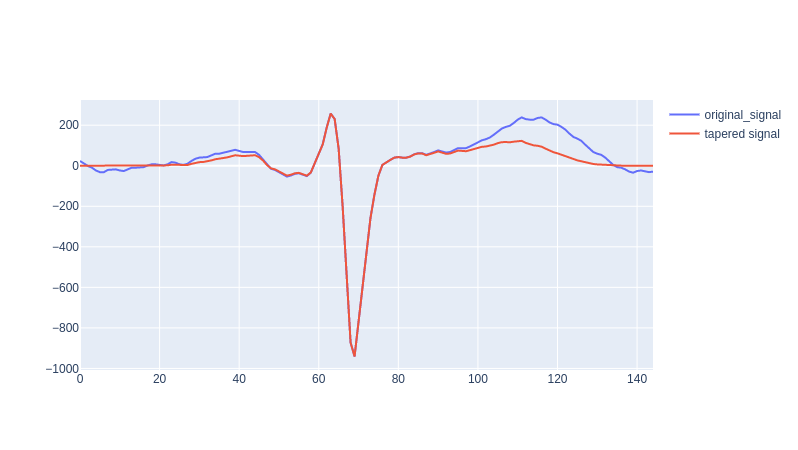

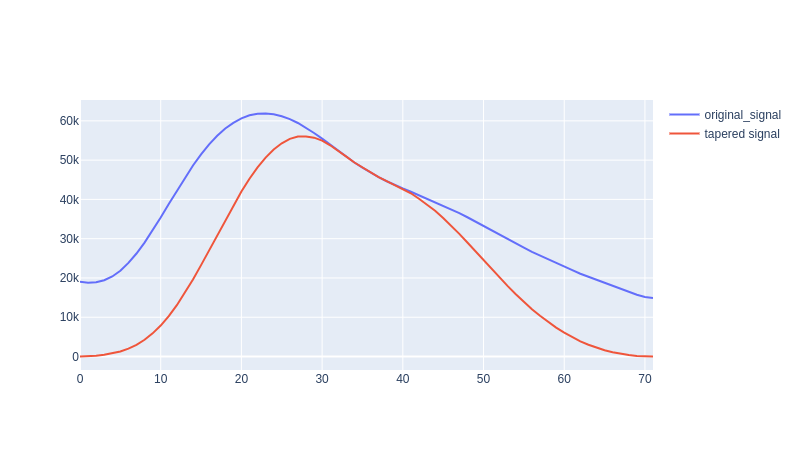

In [120]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_complex,
                         name='original_signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_tapering_zerobaseline,
                         name='tapered signal'))
fig.show(title='ECG')
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_complex,
                         name='original_signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_tapering_zerobaseline,
                         name='tapered signal'))
fig.show(itle='PPG')

### Different windows format can be used to perform tapering process
**window is imported from the scipy package (scipy.signal.window). Default is using Tukey window**


In [121]:
import scipy.signal.windows as wd

**Initialize a hann windows and cast it as a list-type.**

In [125]:
window_ecg = list(wd.hann(len(ecg_sample_complex)))
window_ppg = list(wd.hann(len(ppg_sample_complex)))

In [126]:
ecg_sample_tapering_hann = preprocess.tapering(ecg_sample_complex,
                                           window=window_ecg,
                                           shift_min_to_zero=False)
ppg_sample_tapering_hann = preprocess.tapering(ppg_sample_complex,
                                           window=window_ppg,
                                           shift_min_to_zero=False)

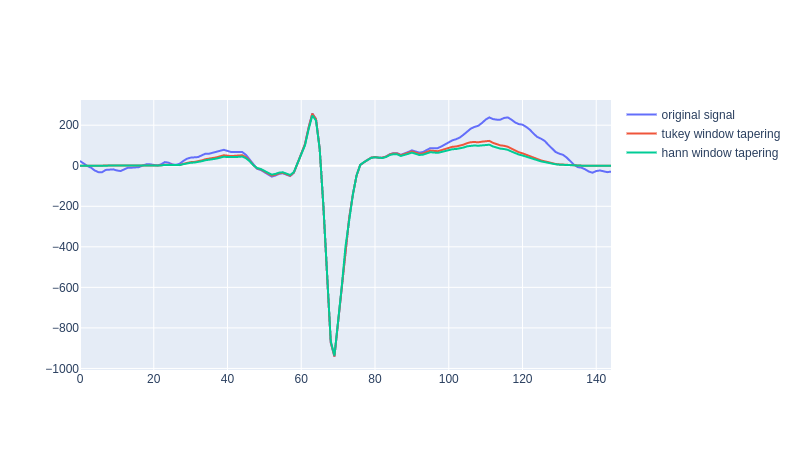

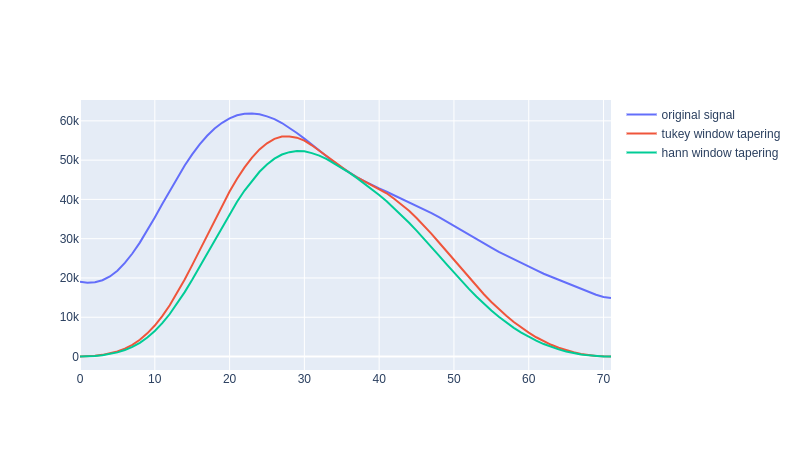

In [127]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_complex,
                         name='original signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_tapering_zerobaseline,
                         name='tukey window tapering'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_tapering_hann,
                         name='hann window tapering'))
fig.show(title='ECG')
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_complex,
                         name='original signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_tapering_zerobaseline,
                         name='tukey window tapering'))
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_tapering_hann,
                         name='hann window tapering'))
fig.show(title='PPG')

### Example of smoothing function.
**Apply a convolutional window to smooth the signal (the default windows is flat and can be assigned with different distribution)**

In [132]:
ecg_sample_smoothing_5 = preprocess.smooth(ecg_sample_complex)
ecg_sample_smoothing_9 = preprocess.smooth(ecg_sample_complex,window_len=9)

ppg_sample_smoothing_5 = preprocess.smooth(ppg_sample_complex)
ppg_sample_smoothing_9 = preprocess.smooth(ppg_sample_complex,window_len=9)

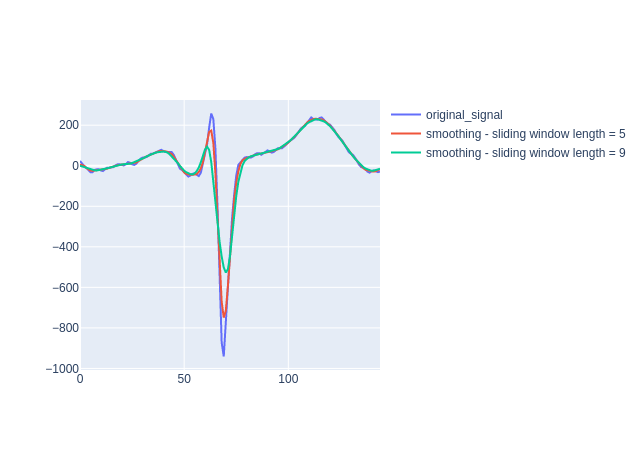

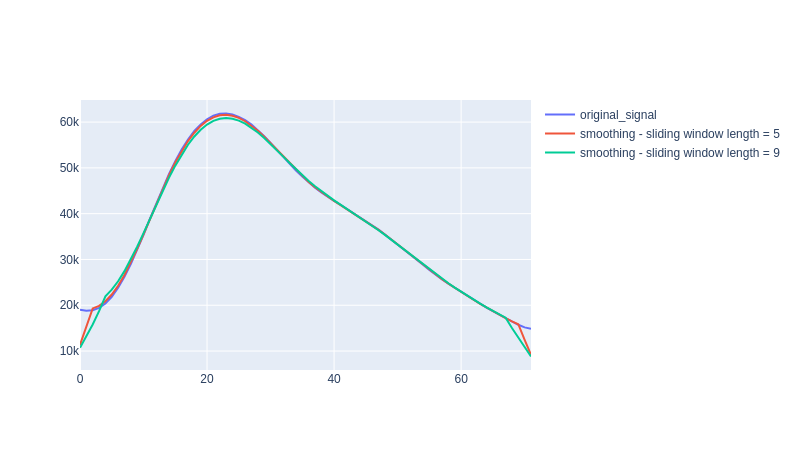

In [134]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_complex,
                         name='original_signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_smoothing_5,
                         name='smoothing - sliding window length = 5'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_smoothing_9,
                         name = 'smoothing - sliding window length = 9'))
fig.show()
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_complex,
                         name='original_signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_smoothing_5,
                         name='smoothing - sliding window length = 5'))
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_smoothing_9,
                         name = 'smoothing - sliding window length = 9'))
fig.show()

### Example of squeezing function
**We will use the default resampling function from scipy package**

In [73]:
from scipy import signal

In [137]:
ecg_sample_squeezing = signal.resample(ecg_sample_complex,
                                       int(len(ecg_sample_complex)/2))
ppg_sample_squeezing = signal.resample(ppg_sample_complex,
                                       int(len(ppg_sample_complex)/2))

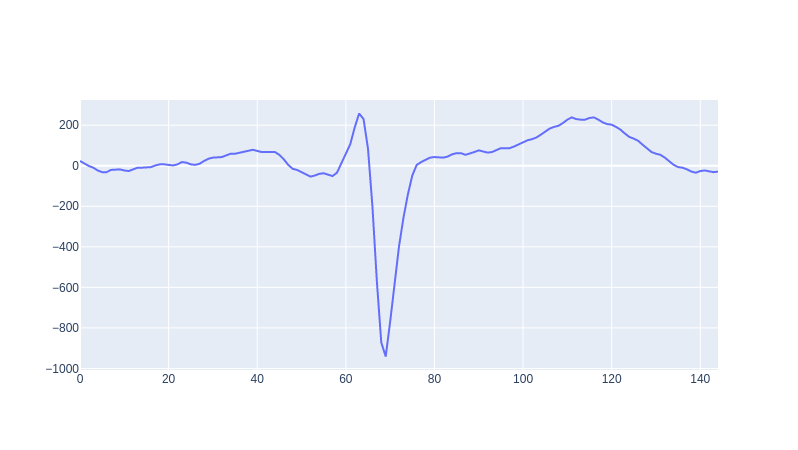

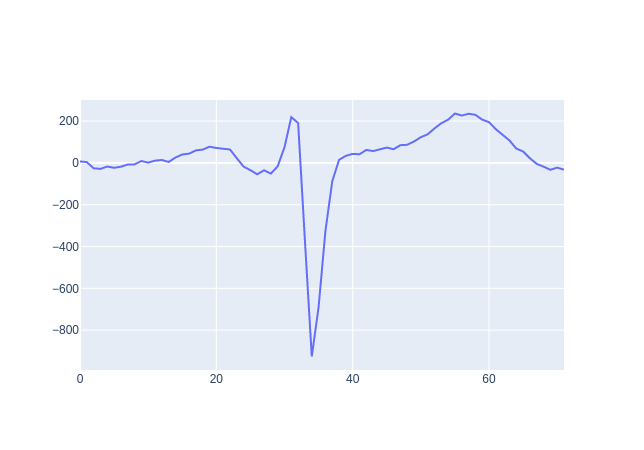

In [138]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_complex))
fig.show(title='original data')
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_squeezing)),
                         y= ecg_sample_squeezing))
fig.show(title='squeezed data')


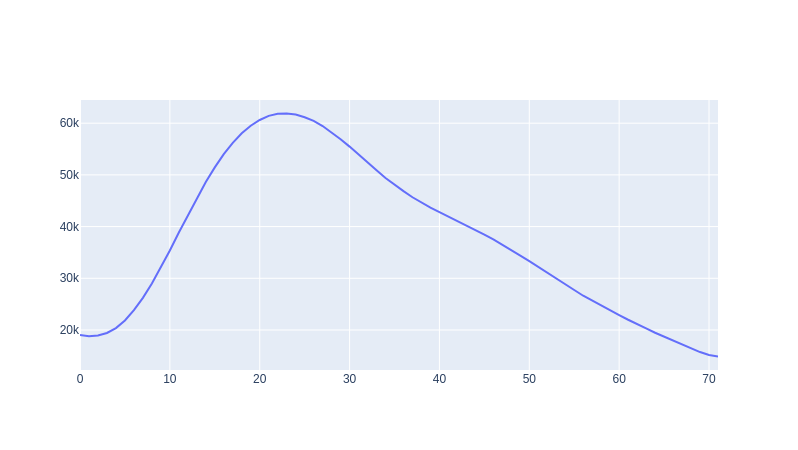

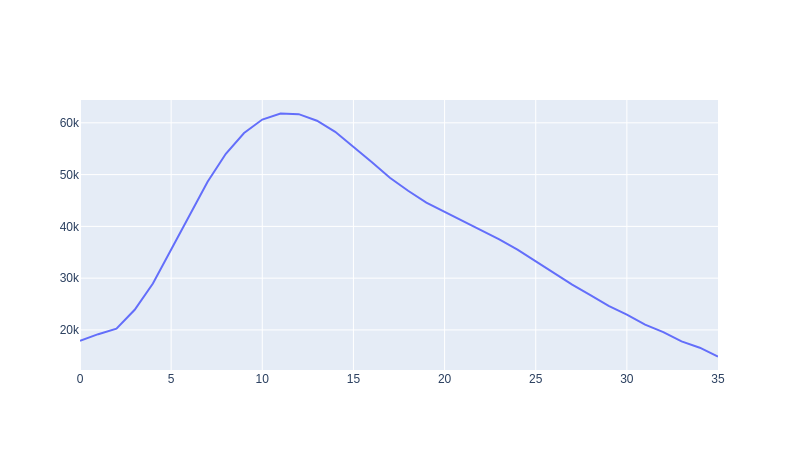

In [139]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_complex,))
fig.show(title='original data')
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_squeezing)),
                         y= ppg_sample_squeezing))
fig.show(title='squeezed data')


### Example of expanding function

In [140]:
ecg_sample_expanding = signal.resample(ecg_sample_squeezing,
                                       int(len(ecg_sample_squeezing)*2))
ppg_sample_expanding = signal.resample(ppg_sample_squeezing,
                                       int(len(ppg_sample_squeezing)*2))

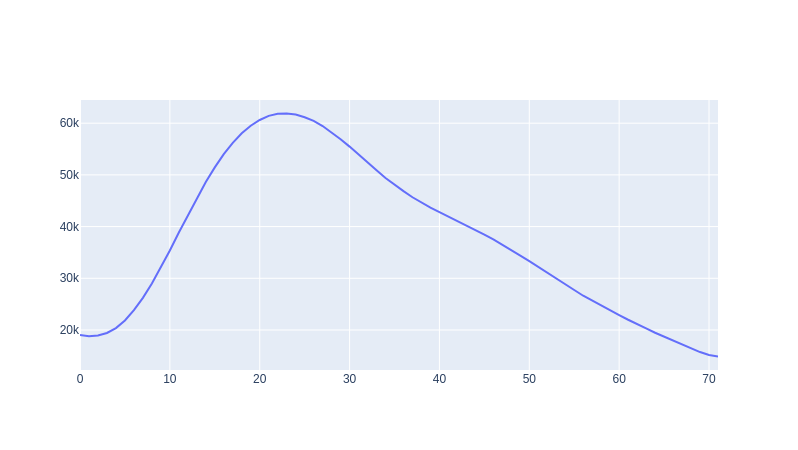

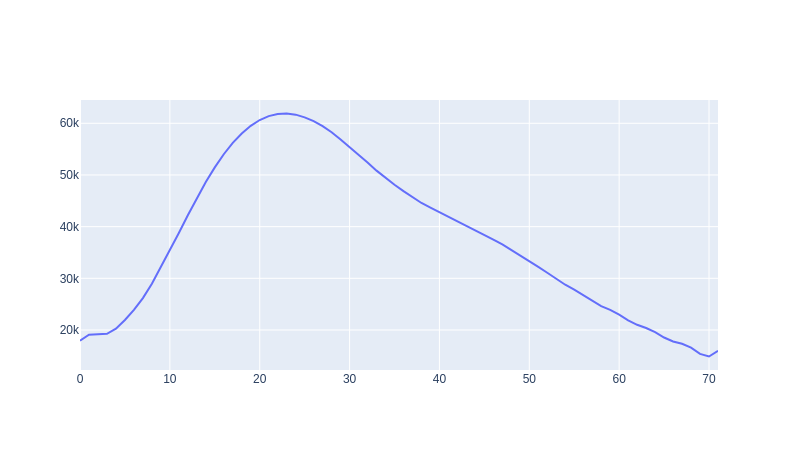

In [141]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_complex,
                         name="original data"))
fig.show(title='original data')
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_expanding)),
                         y= ppg_sample_expanding,
                         name="the expanded data from the squeezed data"))
fig.show()

# Example with bandpass filter

In [142]:
from vital_sqi.preprocess.band_filter import BandpassFilter

In [143]:
butter_bandpass = BandpassFilter("butter",fs=256)
cheby_bandpass = BandpassFilter("cheby1",fs=256)
ellip_bandpass = BandpassFilter("ellip",fs=256)

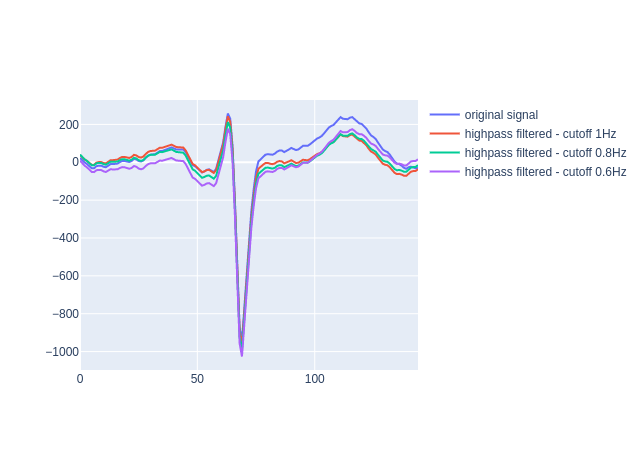

In [144]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_complex,
                         name='original signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= butter_bandpass.signal_highpass_filter(
    ecg_sample_complex,cutoff=1,order=5),
                        name='highpass filtered - cutoff 1Hz'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= butter_bandpass.signal_highpass_filter(
    ecg_sample_complex,cutoff=0.8,order=5),
                        name='highpass filtered - cutoff 0.8Hz'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= butter_bandpass.signal_highpass_filter(
    ecg_sample_complex,cutoff=0.6,order=5),
                        name='highpass filtered - cutoff 0.6Hz'))
fig.show()

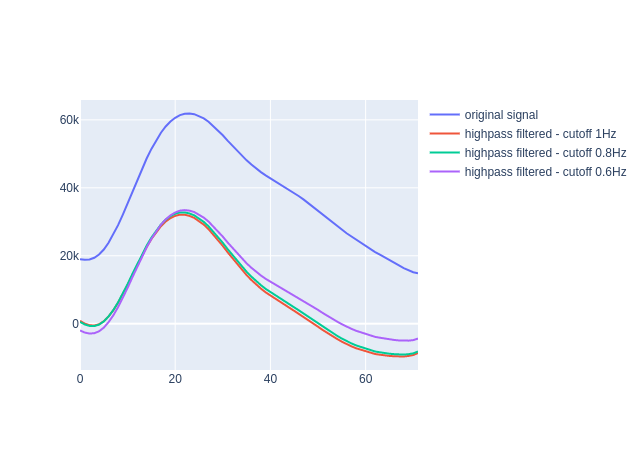

In [145]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_complex,
                         name='original signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= butter_bandpass.signal_highpass_filter(
    ppg_sample_complex,cutoff=1,order=5),
                        name='highpass filtered - cutoff 1Hz'))
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= butter_bandpass.signal_highpass_filter(
    ppg_sample_complex,cutoff=0.8,order=5),
                        name='highpass filtered - cutoff 0.8Hz'))
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= butter_bandpass.signal_highpass_filter(
    ppg_sample_complex,cutoff=0.6,order=5),
                        name='highpass filtered - cutoff 0.6Hz'))
fig.show()

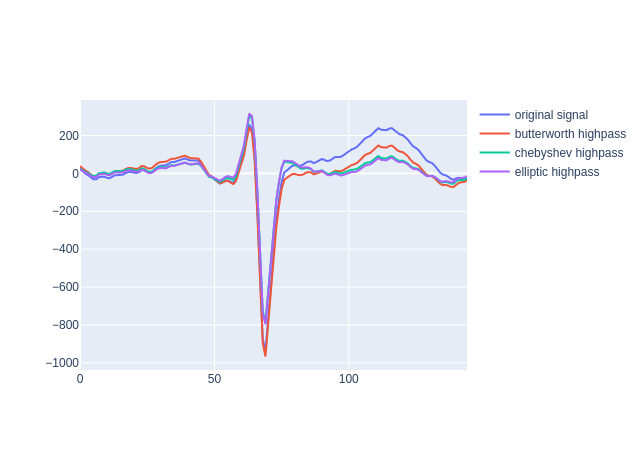

In [146]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ecg_sample_complex,name='original signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= butter_bandpass.signal_highpass_filter(
    ecg_sample_complex,cutoff=1,order=5)
                         ,name='butterworth highpass'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= cheby_bandpass.signal_highpass_filter(
    ecg_sample_complex,cutoff=1,order=5)
                        ,name='chebyshev highpass'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ellip_bandpass.signal_highpass_filter(
    ecg_sample_complex,cutoff=1,order=5)
                        ,name='elliptic highpass'))
fig.show()

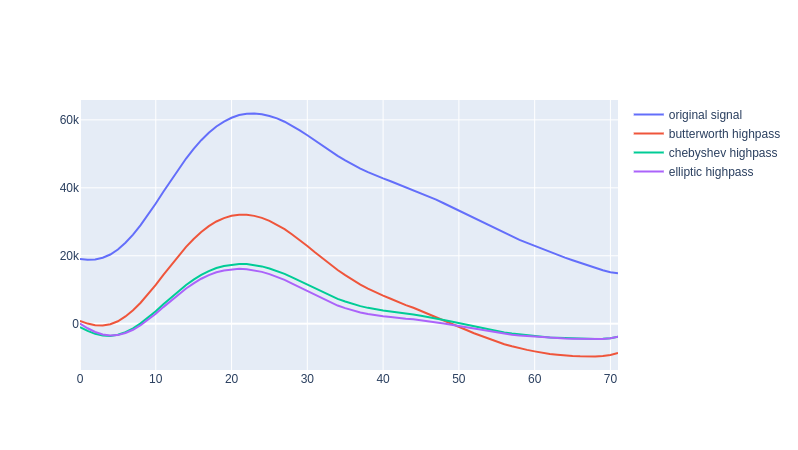

In [147]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= ppg_sample_complex,name='original signal'))
fig.add_trace(go.Scatter(x=np.arange(len(ppg_sample_complex)),
                         y= butter_bandpass.signal_highpass_filter(
    ppg_sample_complex,cutoff=1,order=5)
                         ,name='butterworth highpass'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= cheby_bandpass.signal_highpass_filter(
    ppg_sample_complex,cutoff=1,order=5)
                        ,name='chebyshev highpass'))
fig.add_trace(go.Scatter(x=np.arange(len(ecg_sample_complex)),
                         y= ellip_bandpass.signal_highpass_filter(
    ppg_sample_complex,cutoff=1,order=5)
                        ,name='elliptic highpass'))
fig.show()